In [7]:
!pip install scikit-learn gudhi matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 77.2 MB/s eta 0:00:00


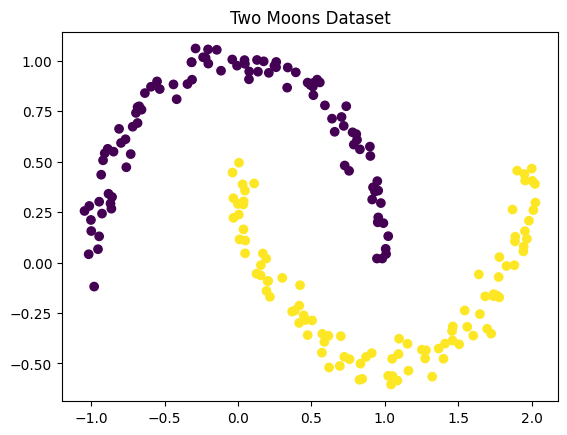

In [8]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Load the dataset
X, y = make_moons(n_samples=200, noise=0.05)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Two Moons Dataset")
plt.show()


Betti numbers: [1, 0]


/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

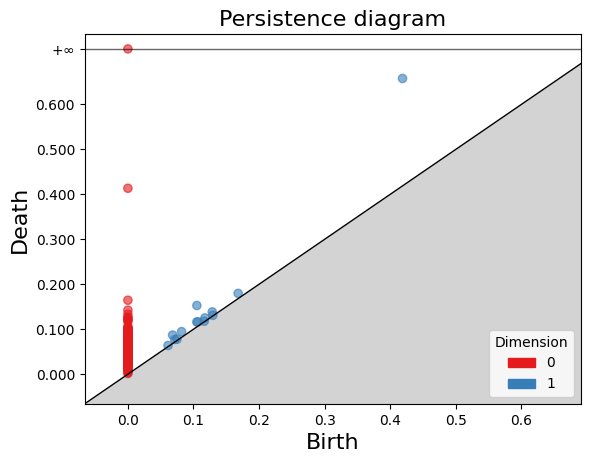

In [9]:
import gudhi as gd
import numpy as np

# Create a Rips complex from the point cloud
rips_complex = gd.RipsComplex(points=X, max_edge_length=2.0)

# Create a simplex tree
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistence diagram
persistence = simplex_tree.persistence()

# Print Betti numbers (number of features)
print("Betti numbers:", simplex_tree.betti_numbers())

# Plot the persistence diagram
gd.plot_persistence_diagram(persistence)


In [10]:
from gudhi.representations import PersistenceImage

# Extract only H1 features (holes)
diag = simplex_tree.persistence_intervals_in_dimension(1)

# Convert to persistence image
pimgr = PersistenceImage(resolution=[20, 20], bandwidth=0.1)
features = pimgr.fit_transform([diag])

print("Persistence Image Shape:", features.shape)


Persistence Image Shape: (1, 400)


In [13]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from gudhi.representations import PersistenceImage
import gudhi as gd
import numpy as np

# Step 1: Generate dataset
X, y = make_moons(n_samples=300, noise=0.1)

# Step 2: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def get_H1_diagram(X_subset):
    rips_complex = gd.RipsComplex(points=X_subset, max_edge_length=2.0)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    simplex_tree.compute_persistence()  # <-- This is the missing line
    return simplex_tree.persistence_intervals_in_dimension(1)




diag0 = get_H1_diagram(X_train[y_train == 0])
diag1 = get_H1_diagram(X_train[y_train == 1])

# Create a dummy dataset with topological features
# Simulating two samples, one for each class
diagrams = [diag0, diag1]
labels = [0, 1]

# Step 5: Compute persistence images
pimgr = PersistenceImage(resolution=[20, 20], bandwidth=0.1)
features = pimgr.fit_transform(diagrams)

# Step 6: Train a simple classifier
clf = SVC(kernel='linear')
clf.fit(features, labels)

# Step 7: Predict (this is artificial since we only have 2 examples)
preds = clf.predict(features)
acc = accuracy_score(labels, preds)

print("Persistence feature classification accuracy:", acc)


Persistence feature classification accuracy: 1.0
